**Instruções:**  

- Justifique seu raciocínio e escreva respostas completas. Os resultados de questões anteriores podem ser usados nas questões seguintes. 

- Explique seu código e comente os gráficos: um gráfico sem referência no texto está “perdido”.

**(Q1) Matrizes Gaussianas:** Uma matriz gaussiana tem todas as entradas $A_{ij}$ independentes e distribuídas segundo uma normal padrão, ou seja, $A_{ij} \sim N(0,1).$

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

**(a) Distribuição das normas:** Faça um histograma da $\Vert \cdot \Vert_2$ das colunas de uma matriz gaussiana $A$, $m \times n$. Use vários valores de $m$, e comente o que você observa.

In [239]:
n = 100

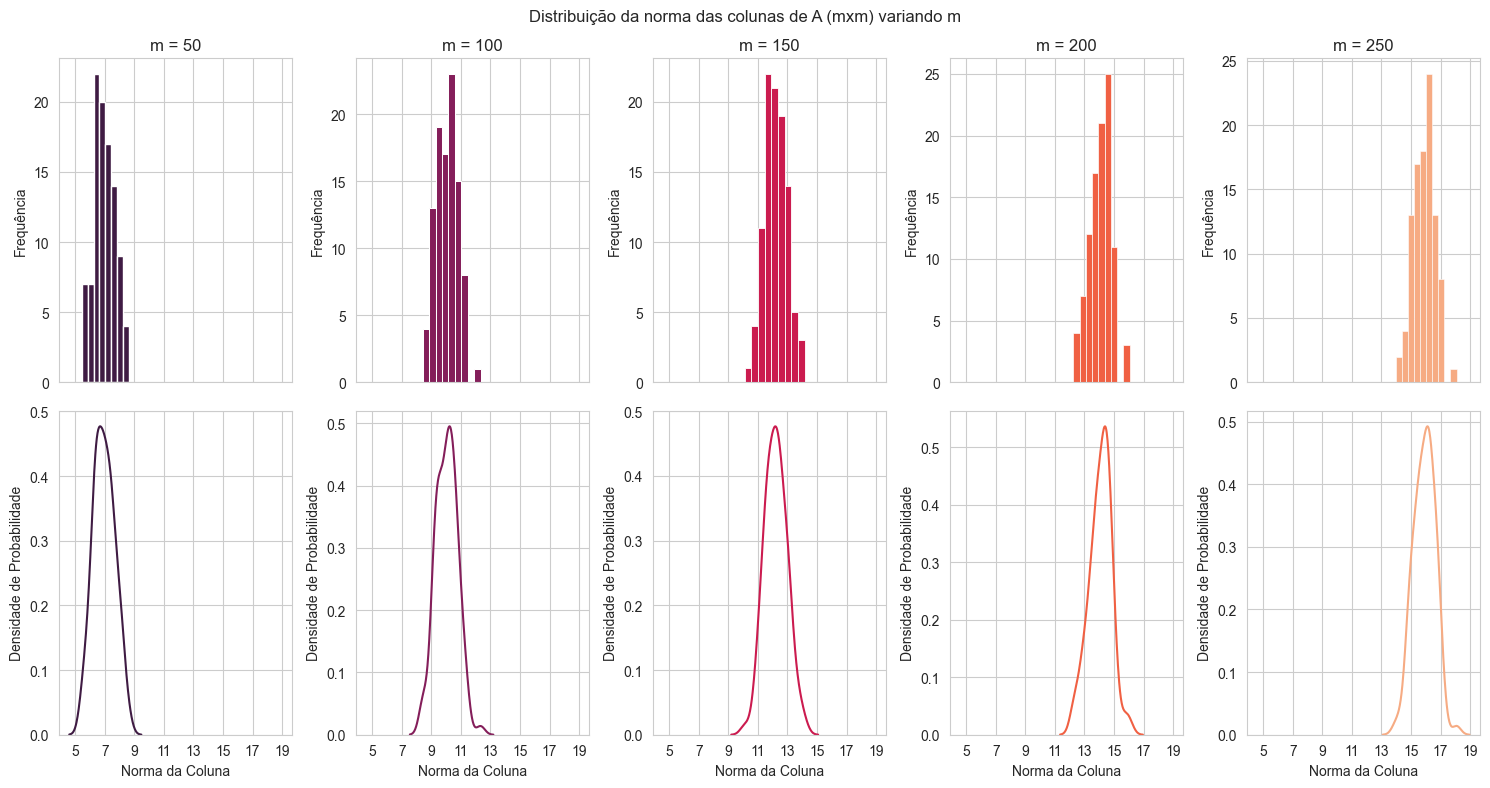

In [240]:
colors = sns.color_palette("rocket", n_colors=5)

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 8), sharex=True)
histogram_axes, kde_axes = ax 
m_vals = list(range(50, 300, 50))

for column_index, (m, color) in enumerate(zip(m_vals, colors)):
    A = np.random.normal(0, 1, size=(m, n))
    norm_list = [np.linalg.norm(A[:, i]) for i in range(n)]
    
    sns.histplot(norm_list, label=f"m = {m}", color=color,ax=histogram_axes[column_index],alpha=1)
    
    sns.kdeplot(norm_list, label=f"m = {m}", color=color,ax=kde_axes[column_index],alpha=1)
    
    histogram_axes[column_index].set_title(f"m = {m}")
    
for row_index, row_axes in enumerate(ax):
    for col_index, current_ax in enumerate(row_axes):
        current_ax.set_xlabel('Norma da Coluna')
        if row_index == 0:
            current_ax.set_ylabel('Frequência')
        else:
            current_ax.set_ylabel('Densidade de Probabilidade')

fig.suptitle("Distribuição da norma das colunas de A (mxm) variando m")

plt.xticks(list(range(5,20,2)))
plt.tight_layout()
plt.show()

É possível notar uma distribuição aparentemente normal entre a norma das colunas de uma matriz $A$. Mais especificamente percebe-se que o valor das normas, a média da distribuição, aumenta conforme o $m$ aumenta, porém o desvio padrão permanece relativamente igual como reforçado pelos diagramas da densidade de probabilidade de cada matiz. 

A razão por qual a média aumenta aparenta ser simples: quanto maior o $m$, ou seja, quanto mais linhas a matriz possue. Logo, temos um vetor com maior número de entradas e por tanto a norma irá crescer. Quanto a distribuição, sabemos que a soma de váriaveis aleatórias normais é também uma normal com média igual a soma das médias e desvio padrão igual a soma dos quadrados dos desvios padrões. Como a norma dois é nesse caso, a raiz da soma dos quadrados de variáveis com distribuição normal, então a norma também será dada por uma distribuição normal.

# TODO TALK MORE ABOUT WITH EXAMPLE ON 2x2 FOR DISTRIBUTION

**(b) Produtos internos:** Agora, fixe $m = 100$ e faça o histograma do produto interno $⟨A_i,A_j⟩$ entre colunas de uma matriz gaussiana $A$. Exclua os casos $i = j$ e use $n = 100,200, 500, 1000$. O que acontece? Qual parece ser a distribuição para $n \rightarrow \infty$?

In [241]:
m = 100

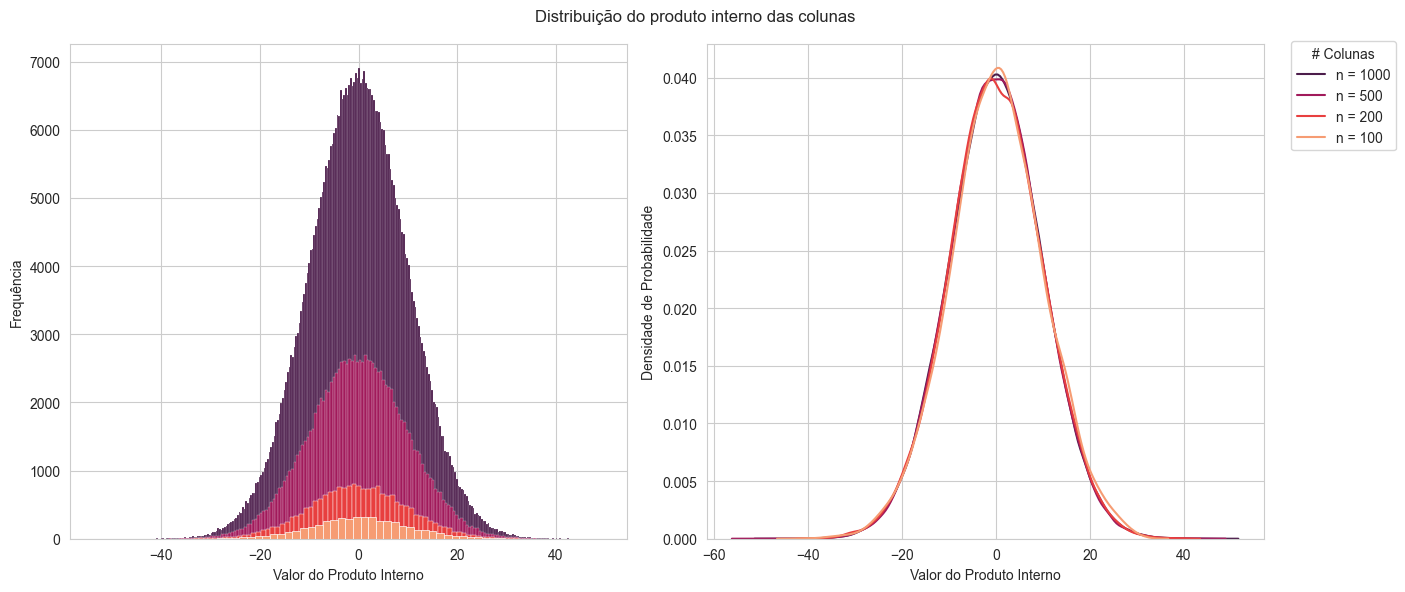

In [242]:
colors = sns.color_palette("rocket", n_colors=4)

fig, (hist_ax, kde_ax) = plt.subplots(ncols=2, figsize=(14, 6))

m = 100

for n, color in zip([1000, 500, 200, 100], colors):
    A = np.random.normal(0, 1, size=(m, n))
    
    inner_products = []
    for i in range(n):
        for j in range(i+1, n):
            inner_products.append(np.dot(A[:, i], A[:, j]))
    
    sns.histplot(inner_products, label=f"n = {n}",alpha=1,color=color,ax=hist_ax)
    
    sns.kdeplot(inner_products,label=f"n = {n}",color=color,ax=kde_ax)

fig.suptitle("Distribuição do produto interno das colunas")

hist_ax.set_xlabel("Valor do Produto Interno")
hist_ax.set_ylabel("Frequência")

kde_ax.set_xlabel("Valor do Produto Interno")
kde_ax.set_ylabel("Densidade de Probabilidade")

kde_ax.legend(title="# Colunas",bbox_to_anchor=(1.25,1.02))

plt.tight_layout()
plt.show()

Conforme aumentamos o número de linhas, nota-se uma concentração dos resultados em volta da média da distribuição original da $A_{ij}$, que continua sendo 0. Mas também é interessante notar que a distribuição continua sendo normal independente do tamanho e a média continua sendo 0, e portanto, quando $n\to \infty$, a distribuição continua sendo normal com média $\mu = 0$.

**(c) A distribuição do máximo:** Queremos ver quão “não ortogonal” é a matriz $A$. Para isto, vamos estudar o máximo de $\frac{\langle A_i, A_j \rangle}{\Vert A_i \Vert \Vert A_j \Vert}$ entre colunas distintas de uma matriz gaussiana $A$. Para isto, gere $K = 1000$ matrizes gaussianas $A_k$ de ordem $100 \times 300$, calcule o máximo indicado acima, e faça um histograma dos $K$ valores obtidos.

In [243]:
k_list = []
A_list =[]
for A in A_list:
    max_k = 0
    for coluna1 in range(300):
        for coluna2 in range(coluna1+1, 300):
            k = abs(np.inner(A[:, coluna1], A[:, coluna2]))/(np.linalg.norm(A[:, coluna1])*np.linalg.norm(A[:, coluna2]))
            if  k > max_k:
                max_k = k
    k_list.append(max_k)

In [244]:
def collect_inner_max(k:int,m:int,n:int) -> list:
    k_list = []
    for _ in range(k):
        A = np.random.normal(0,1,size=(m,n))
        A_col_norms = np.linalg.norm(A,ord=2,axis=0)

        normalized_A = A / A_col_norms

        # Matriz simétrica dos produtos internos das colunas
        inner_products = np.abs(normalized_A.T @ normalized_A) # toma valor absoluto para ignorar sentido do vetor

        inner_products -= np.eye(n) # Removendo diagonal de 1s

        k_list.append(np.max(inner_products))
    return k_list

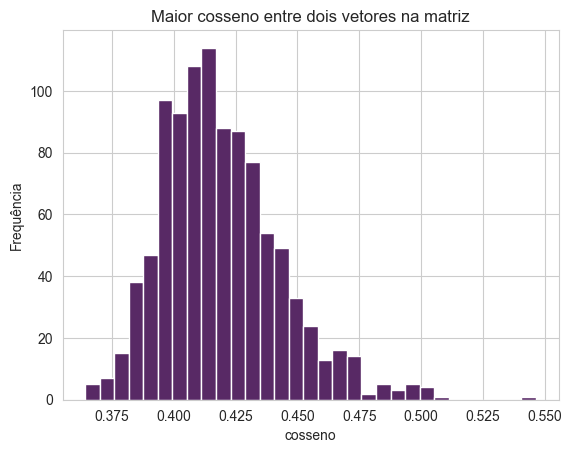

In [245]:
sns.histplot(collect_inner_max(1000,100,300),color='#582965',alpha=1)
plt.ylabel("Frequência")
plt.xlabel("cosseno")
plt.title("Maior cosseno entre dois vetores na matriz")
plt.show()

Vamos abordar esse problema por uma ótica geométrica. O que estamos calculando é basicamente o valor absoluto do cosseno entre os vetores. Quando esse valor se aproxima de 0 quer dizer que os vetores são ortogonais. Como nós estamos vendo o maior valor que esse número assume para cada matriz, estamos vendo o quão "não ortogonal" são os dois vetores menos ortogonais dessa matriz.

**(d) Complexidade computacional:** Qual a complexidade de calcular o máximo acima? Qual valor de $K$ você acha que seria bom para ter uma boa estimativa do máximo esperado?

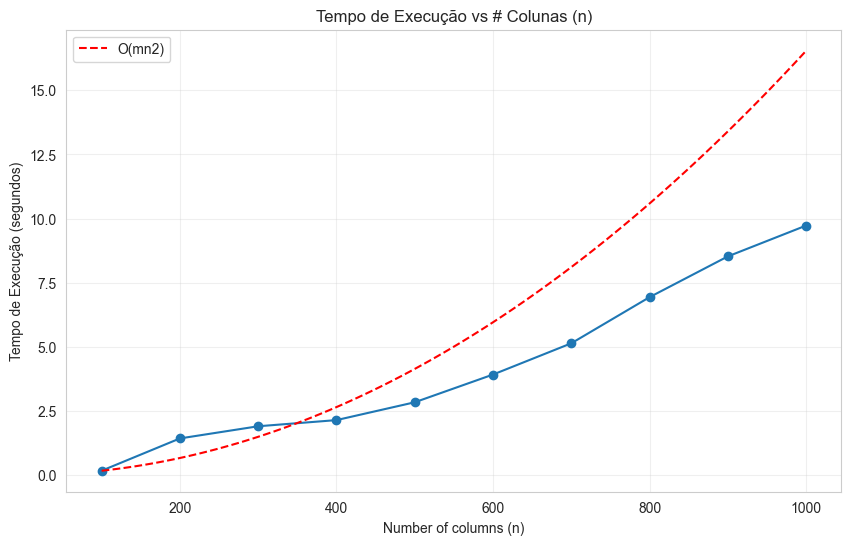

In [246]:
k = 1000
m = 100
n_values = np.arange(100, 1100, 100) 

execution_times = []
for n in n_values:

    start_time = time.time()
    _ = collect_inner_max(k, m, n)
    execution_time = time.time() - start_time

    execution_times.append(execution_time)

plt.figure(figsize=(10, 6))
plt.plot(n_values, execution_times, 'o-')
plt.title('Tempo de Execução vs # Colunas (n)')
plt.xlabel('Number of columns (n)')
plt.ylabel('Tempo de Execução (segundos)')
plt.grid(True, alpha=0.3)

# gerando reta de O(mn^2)
ref_n = np.linspace(100, 1000, 100)
ref_time = execution_times[0] * (ref_n**2) / (n_values[0]**2)

plt.plot(ref_n, ref_time, 'r--', label='O(mn2)')

plt.legend()
plt.show()

Para calular o máximo acima temos 3 operações importantes que devemos considerar:


1. **Normalização das colunas de $A$:**
    - Cálculo da norma de uma coluna $\rightarrow\mathcal{O}(m)$
    - Normalização de $n$ colunas $\rightarrow\mathcal{O}(mn)$


2. **Cálculo da matriz de produtos internos:**
    - Cálculo de $Ax$ $\rightarrow\mathcal{O}(mn)$
    - $A^TA$, essencialmente $Ax$ para $n$ colunas $\rightarrow\mathcal{O}(mn^2)$

3. **Busca do maior produto interno:** 
    - Simplesmente uma comparação para todas as entradas da matriz $n \times n \rightarrow \mathcal{O}(n^2)$

Assim fica claro que nossa complexidade fica, o que condiz com o observado no gráfico:

$$\mathcal{O}(mn)  + \mathcal{O}(mn^2) + \mathcal{O}(n^2) = \mathcal{O}(mn^2)$$


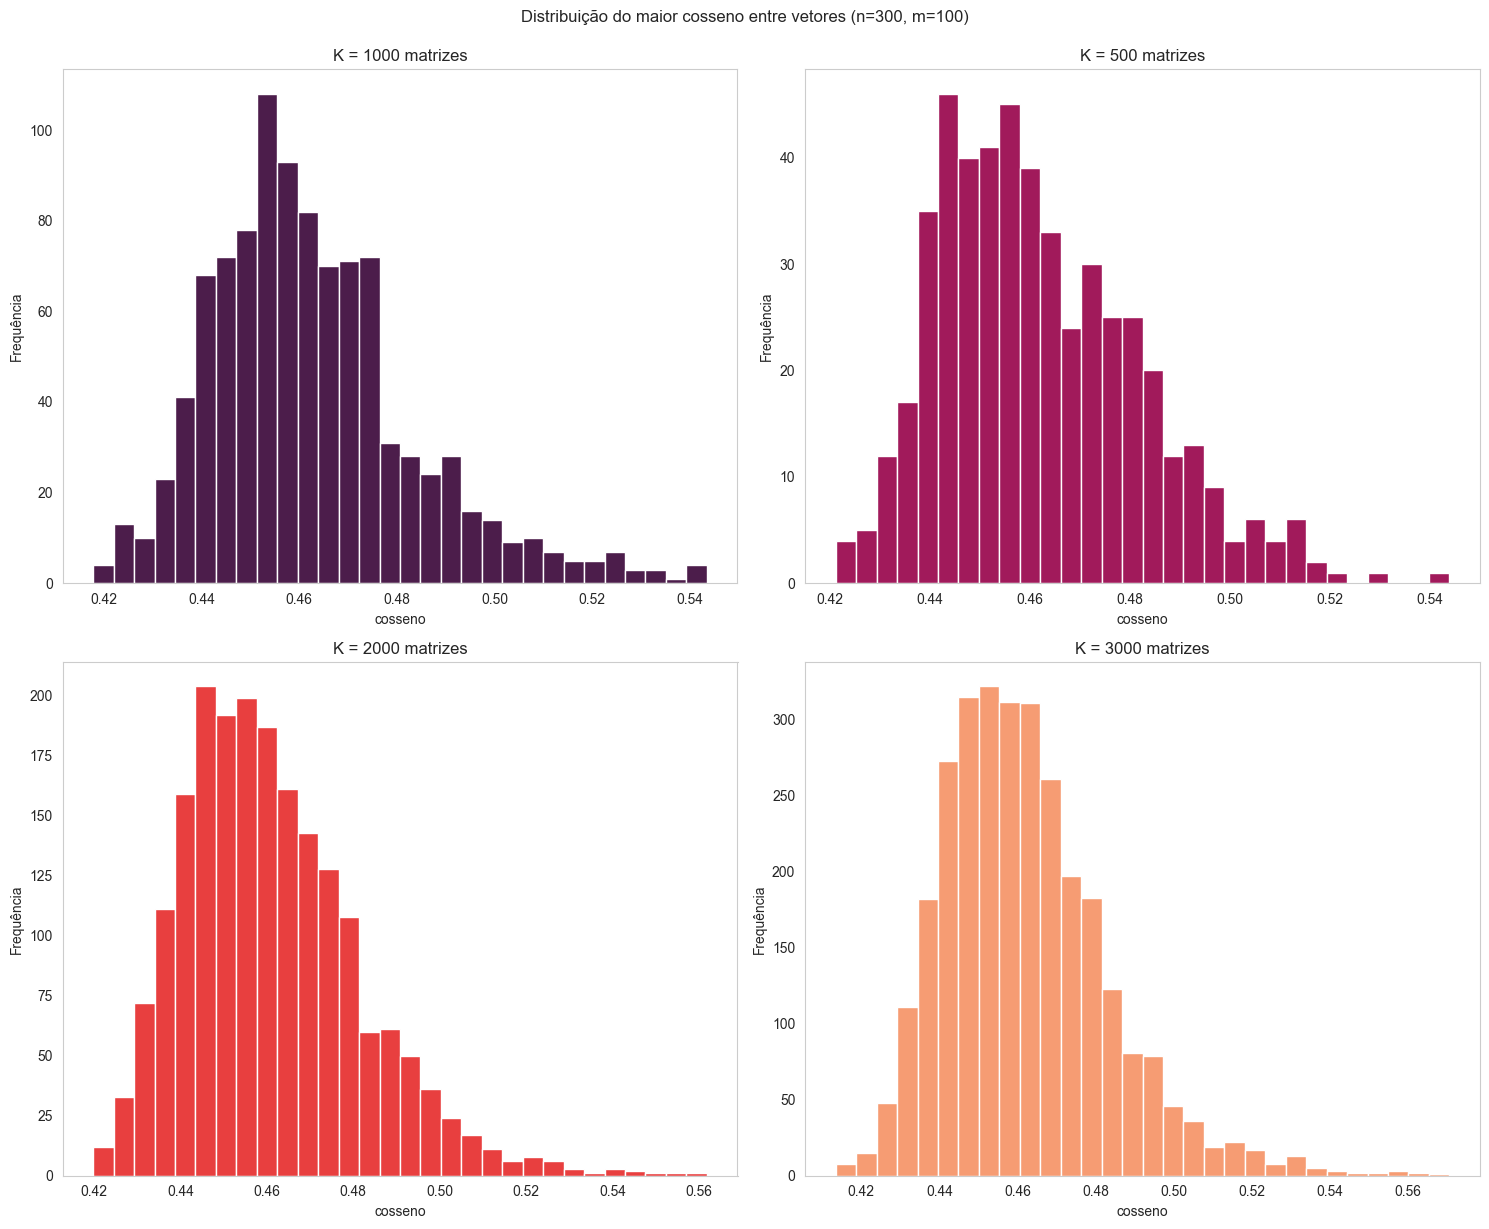

In [247]:
k_values = [1000, 500, 2000, 3000]

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

axs = axs.ravel()
colors = sns.color_palette("rocket",n_colors=4)

for i, k_val in enumerate(k_values):
    data = collect_inner_max(k_val, m, n)
    sns.histplot(data, alpha=1, bins=30, ax=axs[i],color = colors[i])
    axs[i].set_ylabel("Frequência")
    axs[i].set_xlabel("cosseno")
    axs[i].set_title(f"K = {k_val} matrizes")
    axs[i].grid()

plt.tight_layout()
fig.suptitle("Distribuição do maior cosseno entre vetores (n=300, m=100)", y=1.02)
plt.show()

Pelo que podemos observar através dos 4 gráficos, $K = 500$  estimativa menso precisa do valor máximo do produto interno normalizado. No entanto, após exceder $K=2000$ não parece ter melhoria significativa na clareza da distribuição. Assim $K=2000$ é o mais adequado para obter uma boa estimativa, porém seria razoavel usar $K=5000$ ou maior caso tempo de computação não seja uma preocupação.

**(e) A distribuição do máximo - parte 2** Escolha valores de $K$ correspondentes e faça histogramas e comente os resultados para os seguintes pares de $(m,n): (100,100), (100,300), (200,200), (200,600), (500,500), (500,1500), (1000,1000), (1000,3000)$

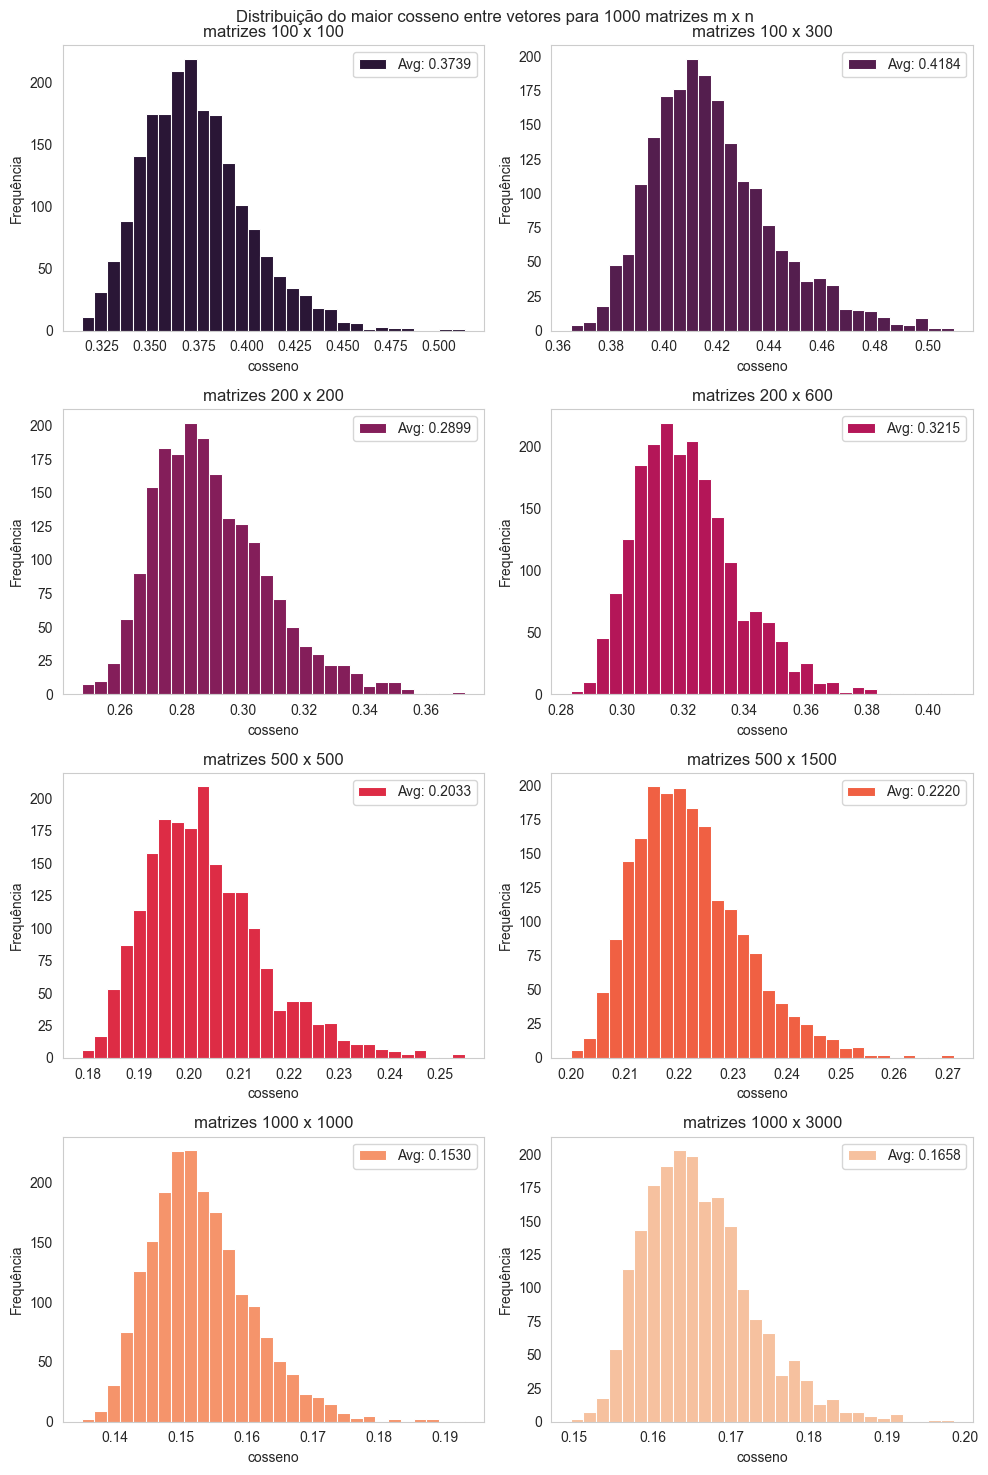

In [249]:
size_pairs = [(100,100),(100,300),(200,200),(200,600),(500,500),(500,1500),(1000,1000),(1000,3000)]

k = 2000

fig, axs = plt.subplots(4,2, figsize=(10, 15))

axs = axs.ravel()

colors = sns.color_palette("rocket",n_colors=8)

for i, each_pair in enumerate(size_pairs):
    m,n = each_pair
    data = collect_inner_max(k, m, n)
    
    sns.histplot(data, alpha=1, bins=30, ax=axs[i],color = colors[i])
    axs[i].set_ylabel("Frequência")
    axs[i].set_xlabel("cosseno")
    axs[i].set_title(f"matrizes {m} x {n}")
    axs[i].grid()
    
    avg_cos = np.mean(data)
    axs[i].legend([f"Avg: {avg_cos:.4f}"], loc='upper right')

fig.suptitle("Distribuição do maior cosseno entre vetores para 1000 matrizes m x n")
plt.tight_layout()
plt.show()

**Análise dos Resultados:**  

Os histogramas revelam três padrões principais:  

1. **Assimetria à direita**: Todas as distribuições apresentam cauda alongada para valores altos, indicando que os máximos de similaridade de cosseno tendem a se concentrar abaixo da média, mas com ocorrências ocasionais de valores muito maiores.  

2. **Dependência dimensional**:  
   - Em matrizes quadradas ($m = n$), a média diminui consistentemente com o aumento de $m$.  
   - Sistemas subdeterminados ($m < n$) exibem médias constantemente maiores que suas contrapartes quadradas, refletindo a maior probabilidade de alinhamento entre colunas quando $n \gg m$.  

3. **Redução de variância**: À medida que $m$ aumenta, a dispersão dos valores máximos diminui visivelmente (histogramas mais estreitos), evidenciando o efeito de concentração em altas dimensões.  